# Folium Popup Image

In [5]:
import base64
import folium
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [23]:
df = pd.read_csv('./results/02.crime.csv')
df.rename(columns={'살인검거율':'살인','강도검거율':'강도',
                   '강간검거율':'강간','절도검거율':'절도',
                   '폭력검거율':'폭력'}, inplace=True)
df.head()

,구별,살인발생,강도발생,강간발생,절도발생,폭력발생,살인,강도,강간,절도,폭력,범죄,검거,인구수,CCTV
0,강남구,0.333333,0.285714,1.000000,1.000000,1.000000,60.000000,100.000000,84.384384,45.084175,86.358666,0.723810,81.447452,544085,5221
1,강동구,0.416667,1.000000,0.156250,0.394495,0.385785,83.333333,93.333333,86.111111,54.969697,86.638927,0.470639,87.636658,462275,1879
2,강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601,0.280644,85.404686,313550,1265
3,강서구,0.583333,0.142857,0.375000,0.577982,0.547658,100.000000,100.000000,83.986928,52.536585,85.881893,0.445366,91.541649,589536,1617
4,관악구,1.000000,0.642857,0.552083,0.657339,0.595727,76.923077,100.000000,82.107843,48.807917,88.593867,0.689601,85.912971,514555,3985


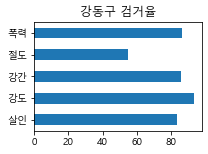

In [24]:
fig = plt.figure(figsize=(3,2))
plt.title('강동구 검거율')
df.iloc[1,6:11].plot(kind='barh')
fig.savefig('figures/강동구.png', dpi=80)

In [11]:
encoded = base64.b64encode(open('figures/강동구.png', 'rb').read())
html = '<img src="data:image/png;base64,{}">'.format
iframe = folium.IFrame(html(encoded.decode('UTF-8')), width=300, height=200)
popup = folium.Popup(iframe, max_width=240)

In [12]:
map = folium.Map(location=[37.559868, 126.967109], zoom_start=14)
folium.Marker(
    location=[37.559868, 126.967109],
    tooltip='한국경제신문사',
    popup=popup
).add_to(map)
map

- 구청 위도, 경도 구하기

In [18]:
import requests
from urllib.parse import quote

In [19]:
with open('../04.지도_공공API/roadapikey.txt', mode='r') as key_file:
    road_key = key_file.read()
road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'

In [20]:
addr_list = []
for i in df.index:
    url = f"{road_url}?confmKey={road_key}&currentPage=1&countPerPage=10&keyword={quote(df.구별[i]+'청')}&resultType=json"
    result = requests.get(url).json()
    road_address = result['results']['juso'][0]['roadAddr']
    addr_list.append(road_address)

In [32]:
with open('../04.지도_공공API/kakaoapikey.txt', 'r') as key_fd:
    kmap_key = key_fd.read()
kakao_url = 'https://dapi.kakao.com/v2/local/search/address.json'

In [21]:
lat_list, lng_list = [], []
for addr in addr_list:
    url = f'{kakao_url}?query={quote(addr)}'
    result = requests.get(url,
            headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    lat_list.append(lat)
    lng_list.append(lng)

In [26]:
df['lat'] = lat_list
df['lng'] = lng_list

- 지도에 각 구별 검거율 그래프 표시하기

In [34]:
map = folium.Map(
    location=[37.5502, 126.982], zoom_start=11,
)
for i in df.index:
    fig = plt.figure(figsize=(3,2))
    plt.title('검거율')
    df.iloc[i,6:11].plot(kind='barh')
    figname = f'figures/fig{i}.png'
    fig.savefig(figname, dpi=80)
    plt.close()

    encoded = base64.b64encode(open(figname, 'rb').read())
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = folium.IFrame(html(encoded.decode('UTF-8')), width=300, height=200)
    popup = folium.Popup(iframe, max_width=240)
    folium.Marker(
        location=[df.lat[i], df.lng[i]],
        tooltip=df.구별[i],
        popup=popup
    ).add_to(map)
map